In [25]:
import sys
for k in ['ham_basic', 'Sequencer', 'sequencer', 'MetaVisualizer', 'visualizer']:
    if k in sys.modules: del sys.modules[k]
import pandas as pd
import numpy as np
import time

from ham_basic import program
program.initialize(B=200, R=0.5, delta=1)
program.read_data(pd.read_csv('close.csv'))

In [26]:
from sequencer import Sequencer
from scipy.optimize import minimize

seqs = []
ansatze = [
    'EfficientSU2',
   # 'NLocal',
   # 'TwoLocal',
    'PauliTwoDesign',
    'RealAmplitudes',
   # 'ExcitationPreserving'
]
    

for ansatz in ansatze:
    print(ansatz)
    
    seq = Sequencer()
    seq.set_name(ansatz)
    seq.set_program(program)
    seq.set_backend('statevector')
    seq.set_ansatz(f'qiskit-{ansatz}')

    
    x0 = 2 * np.pi * np.random.random(seq.ansatz_num_params())
    print(seq.ansatz.num_parameters)
    start_time = time.time()
    cobyla = minimize(seq.cost_func, x0, method='COBYLA', options={'disp': False, 'maxiter': 600})
    end_time = time.time()
    
    print("time for operation", end_time-start_time)
    opt_params = cobyla.x    
    ans_r = seq.ansatz_eval(opt_params)
    program.interpret_qiskit_result(ans_r)

    seqs.append(seq)

EfficientSU2
24
time for operation 6.096726894378662
optimal vector: [0. 0. 0. 1.]
money invested: 181.27999877929688
PauliTwoDesign
12
time for operation 1.7463171482086182
optimal vector: [0. 0. 0. 1.]
money invested: 181.27999877929688
RealAmplitudes
12
time for operation 4.4619526863098145
optimal vector: [0. 0. 0. 1.]
money invested: 181.27999877929688


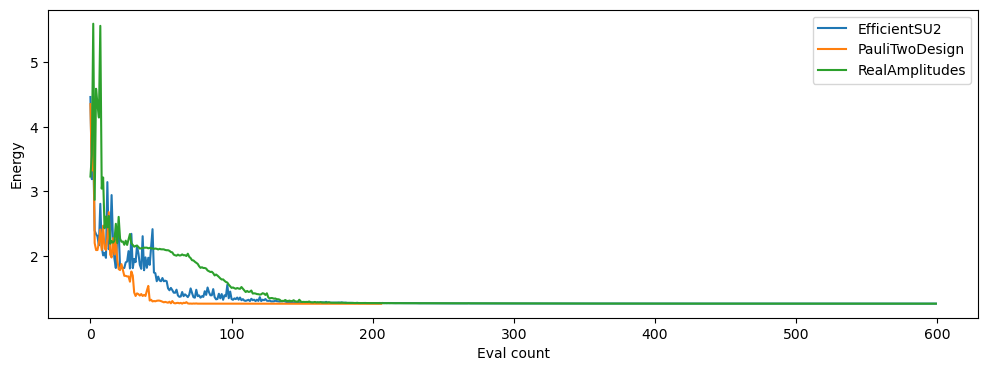

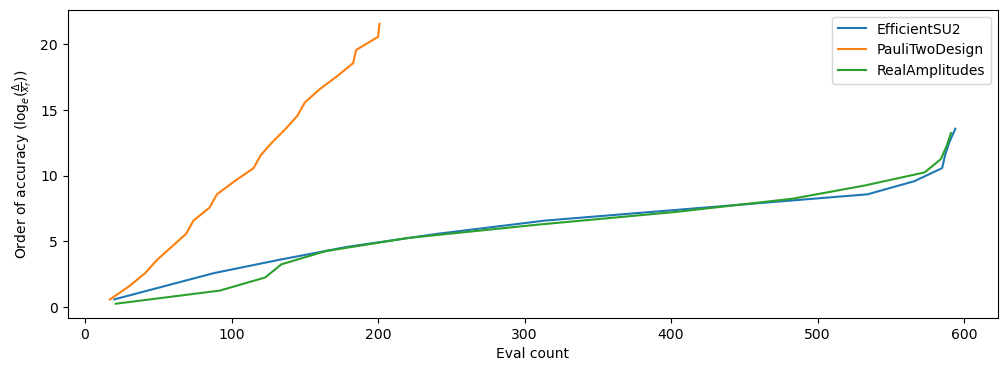

In [27]:
from visualizer import MetaVisualizer
viser = MetaVisualizer(seqs)
viser.convergence_plots()
viser.order_plots()